# Fetal Health Classification


In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [137]:
df = pd.read_csv('/content/drive/MyDrive/CS116/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#Data Analysis:

In [138]:
df.shape

(2126, 22)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [140]:
# to check for null values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#Data Visualizations
1.0 = Normal

2.0 = Suspect

3.0 = Pathological

Text(0.5, 1.0, 'Number of samples of each class')

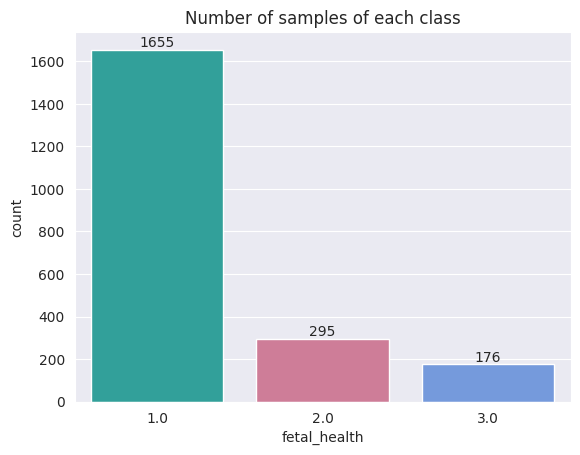

In [141]:
ax = sns.set_style(style='darkgrid')
palette = {1.0: 'lightseagreen', 2.0: 'palevioletred', 3.0:'cornflowerblue'}
ax = sns.countplot(data=df, x = 'fetal_health', palette = palette)
ax.bar_label(ax.containers[0])
plt.title("Number of samples of each class")

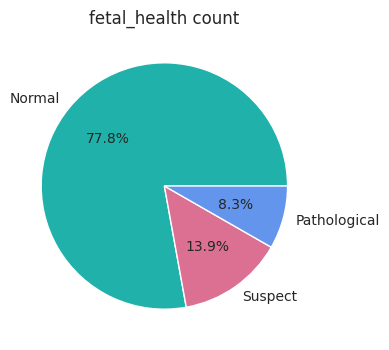

In [142]:
total = df['fetal_health'].count()

normal = total - (295 + 176)
suspect = total - (1655 + 176)
pathological = total - (1655 + 295)

plt.figure(figsize = (6,4))
plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ['lightseagreen','palevioletred','cornflowerblue'], autopct="%1.1f%%")
plt.title("fetal_health count")

plt.show()

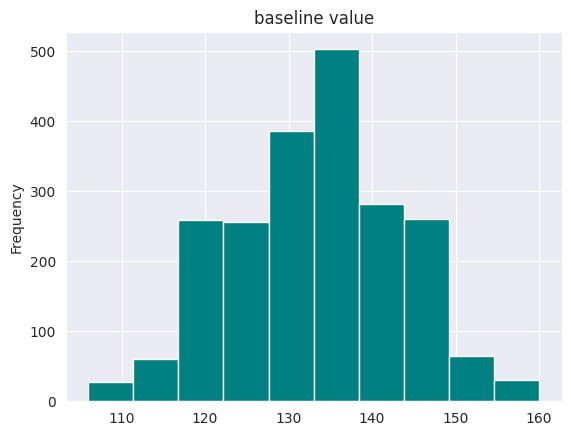

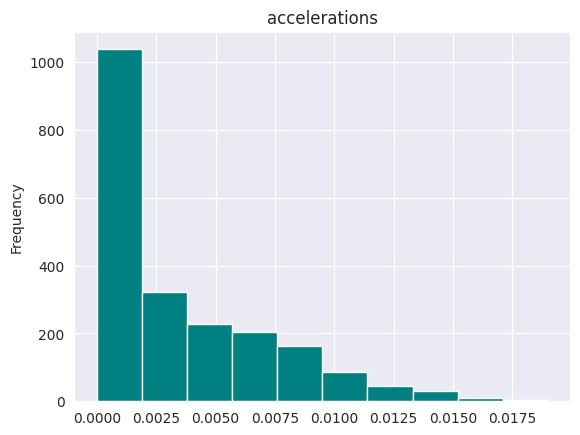

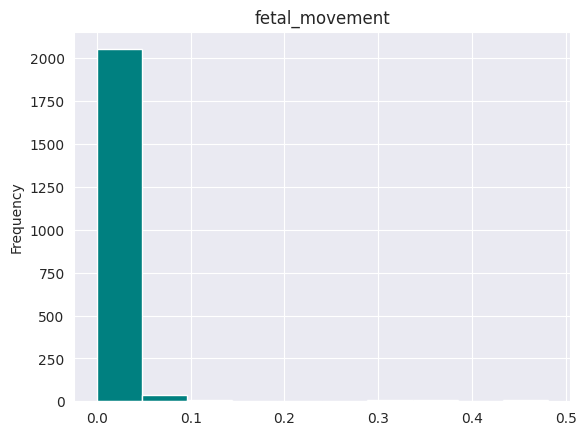

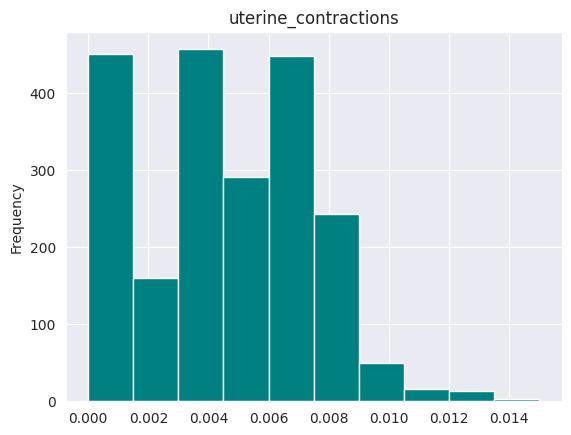

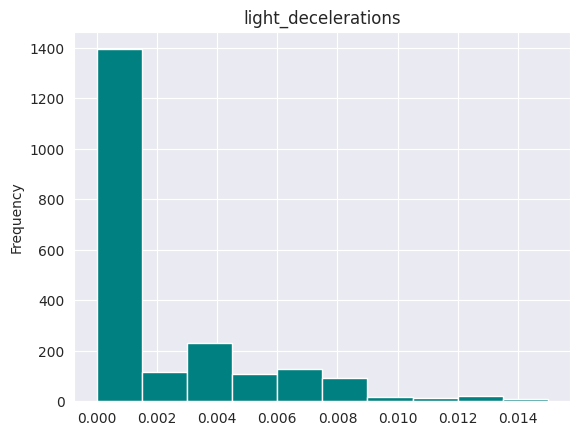

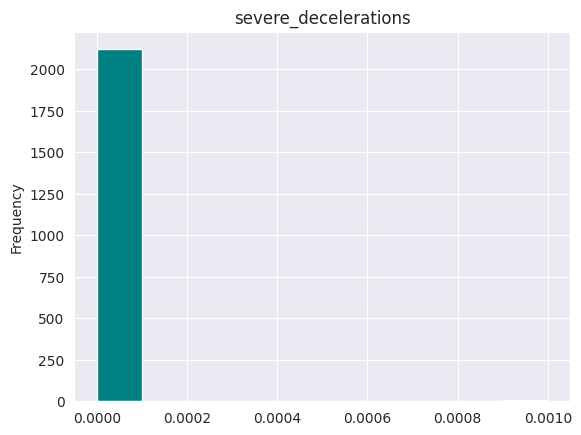

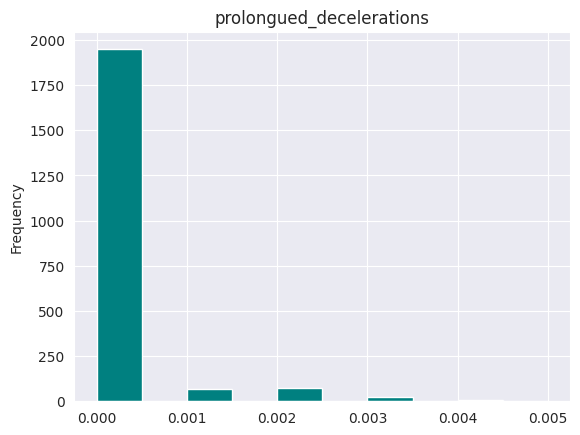

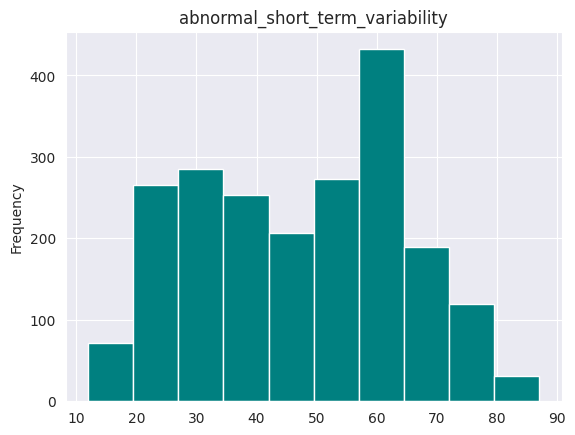

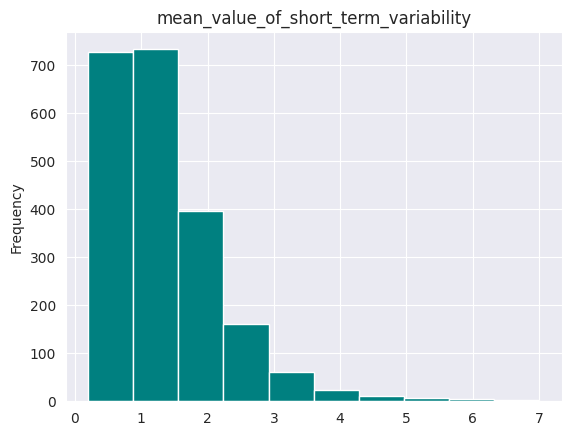

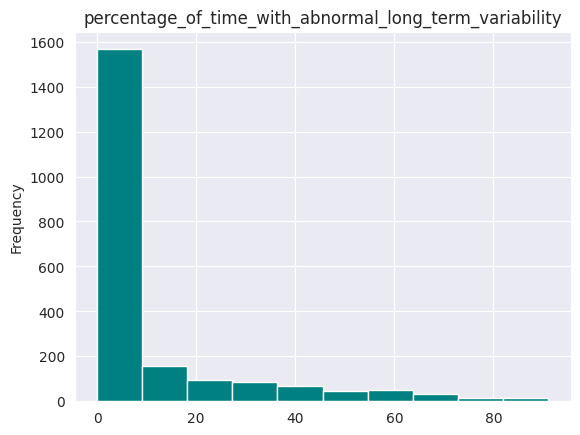

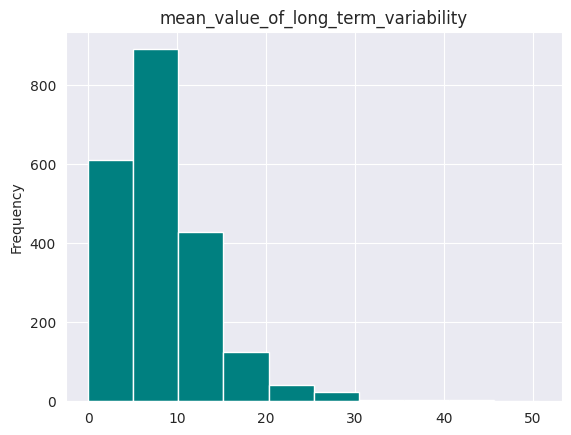

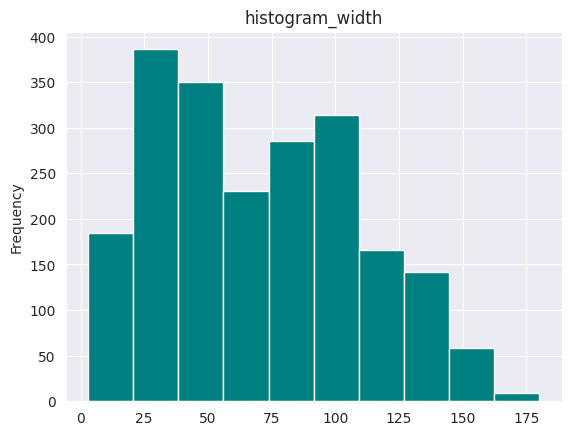

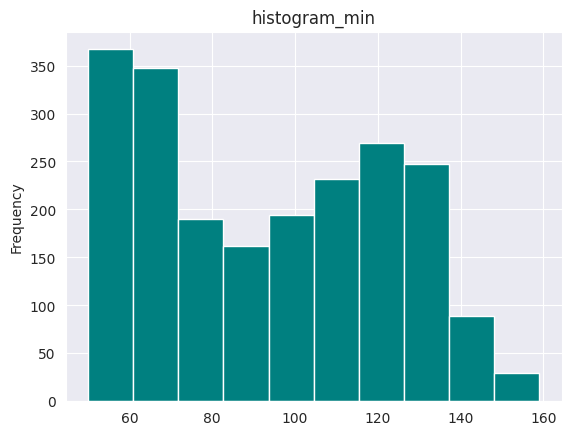

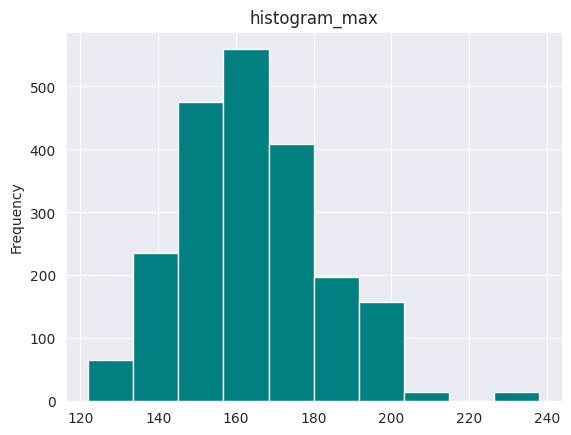

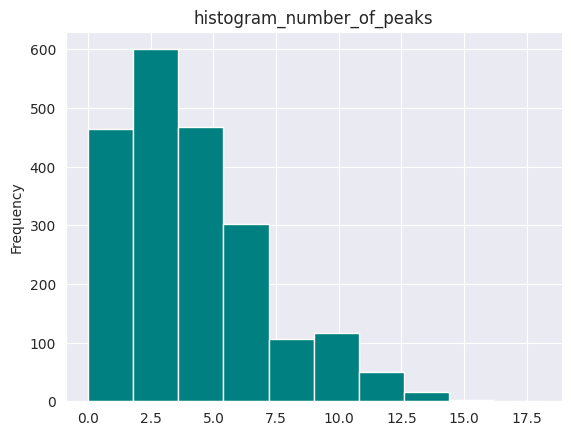

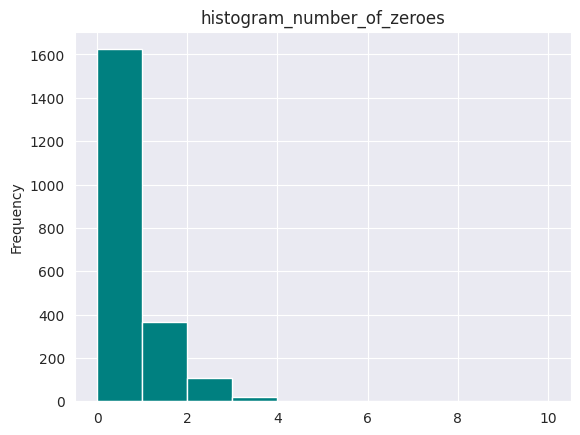

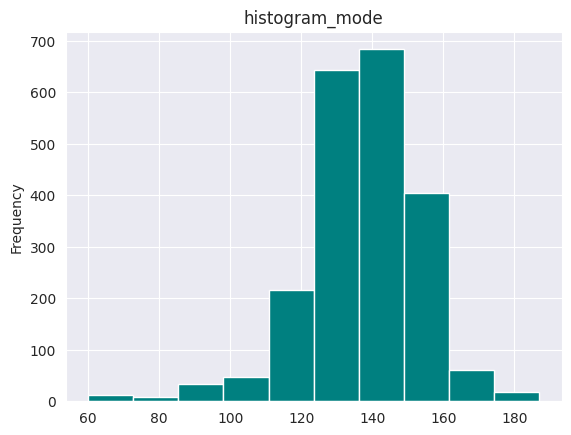

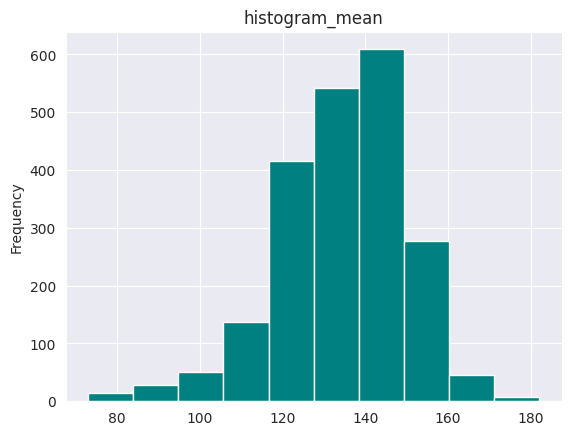

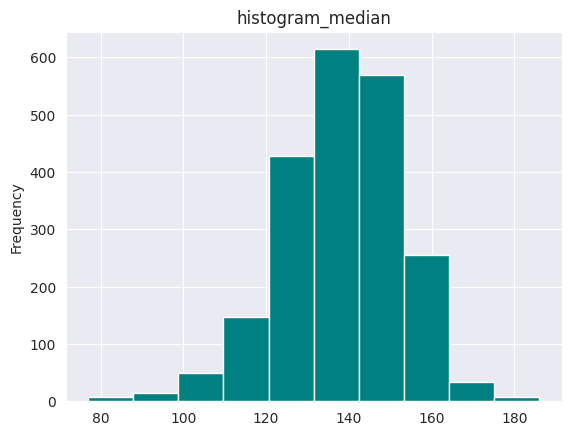

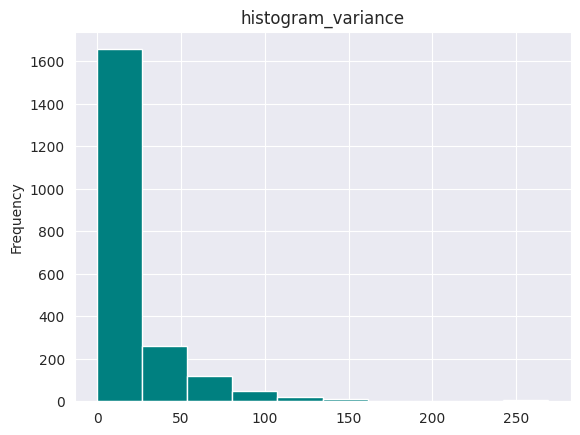

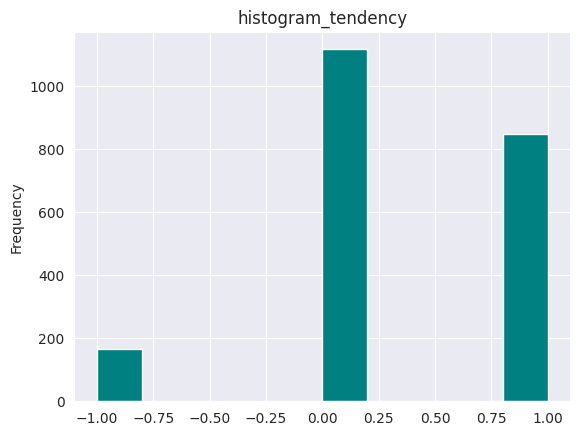

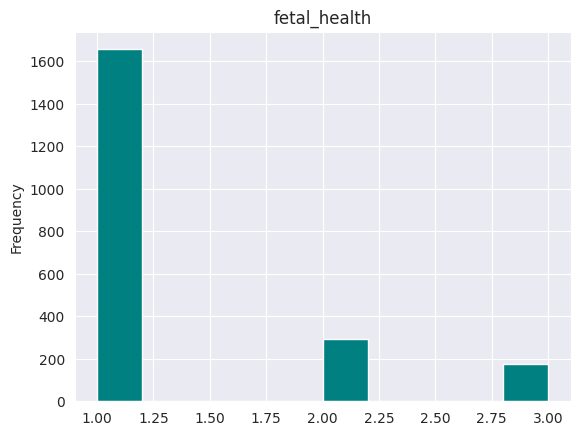

In [143]:
#EDA
for i in df.columns:
    df[i].plot.hist(color='teal')
    plt.title(i)
    plt.show()

In [144]:
num_data = df.select_dtypes(exclude="object")
num_corr = num_data.corr()
num_feature = num_corr["fetal_health"].sort_values(ascending=False).to_frame()
cm = sns.light_palette('teal', as_cmap=True)
style = num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


Text(0.5, 1.0, 'Correlation of all features')

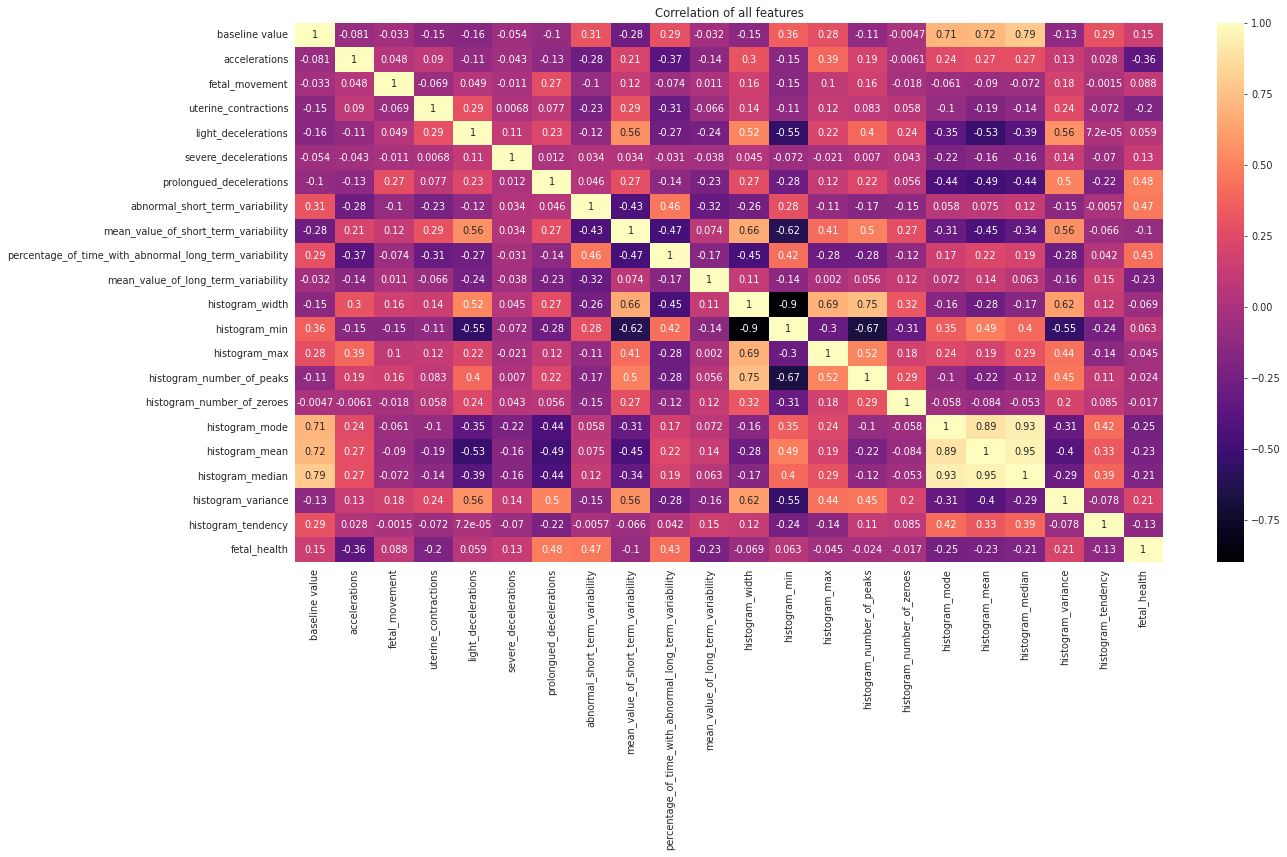

In [145]:
plt.figure(figsize=(20,10),dpi=70)
sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.title('Correlation of all features')

#Encoding the labels
The label "fetal_health" will be encoded with LabelEncoder to convert the scale 1) Normal, 2) Suspect, 3) Pathological into 0, 1, 2, respectively.

In [146]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

In [147]:
# define and fit the encoder
le = LabelEncoder()
le.fit(y)
# apply the encoder into the data
#y_encoded = 'FetalHealth' instead of y = 'fetal_health'
y_encoded = pd.DataFrame(le.transform(y), columns=['FetalHealth'])

In [148]:
# Adding the data into the dataset and removing the old label column
df = pd.concat([df, y_encoded], axis=1)
df.drop(['fetal_health'], axis=1, inplace=True)

In [149]:
X = df.drop('FetalHealth',axis=1)
y = df['FetalHealth']

In [150]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


Text(0.5, 1.0, 'Number of samples of each class')

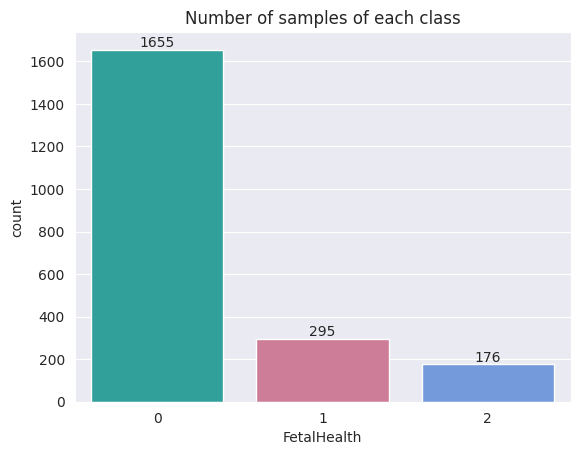

In [151]:
ax = sns.set_style(style='darkgrid')
palette = {0.0: 'lightseagreen', 1.0: 'palevioletred', 2.0:'cornflowerblue'}
ax = sns.countplot(data=df, x = 'FetalHealth', palette = palette)
ax.bar_label(ax.containers[0])
plt.title("Number of samples of each class")

#Oversampling of Minority Class:

In [152]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X, y = oversample.fit_resample(X, y)

Text(0.5, 1.0, 'Number of samples of each class')

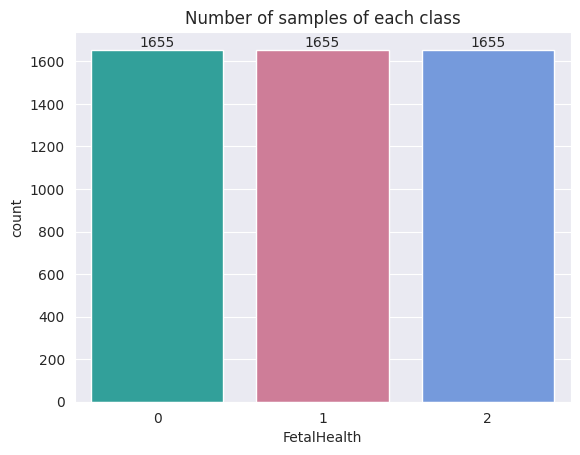

In [153]:
ax = sns.set_style(style='darkgrid')
palette = {0.0: 'lightseagreen', 1.0: 'palevioletred', 2.0:'cornflowerblue'}
ax = sns.countplot(data=pd.DataFrame(y), x = 'FetalHealth', palette = palette)
ax.bar_label(ax.containers[0])
plt.title("Number of samples of each class")

# Train test split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
std_X_train = pd.DataFrame(X_train)
std_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.975205,1.477294,0.691949,0.749096,0.869118,-0.120662,-0.458851,-2.159299,1.281207,-0.748313,...,1.491079,-0.971774,1.761042,1.236530,0.893746,-0.344204,-0.271268,-0.425959,-0.215640,-0.356631
1,-0.681505,-0.525828,-0.228429,1.382634,1.467150,-0.120662,-0.458851,-1.094990,1.381041,-0.748313,...,1.355343,-1.332964,0.818325,0.291527,0.893746,0.004688,-0.318371,-0.318778,-0.008489,-0.356631
2,-1.268906,-0.525828,-0.228429,0.749096,-0.027929,-0.120662,-0.458851,-1.745401,0.183030,-0.592679,...,-0.341363,-0.128997,-1.014737,-0.023474,-0.414272,-0.300593,-0.506782,-0.693912,-0.445807,-0.356631
3,-0.485705,0.141879,-0.193698,1.382634,1.766165,-0.120662,1.566212,0.442346,1.281207,-0.748313,...,2.101893,-1.363063,2.494267,0.921529,-0.414272,-3.178955,-2.249585,-1.122637,4.963125,-1.852450
4,1.472297,-0.525828,-0.228429,-1.151517,-0.625961,-0.120662,-0.458851,-0.208065,-0.715479,1.664015,...,-1.223650,1.676952,0.085100,-1.283479,-0.414272,1.225812,1.330227,1.396122,-0.560891,-0.356631


#1. Support Vector Machine model:

In [157]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [100, 10, 1, 0.1, 0.01], 'kernel': ['rbf', 'poly', 'sigmoid']}
svm_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.336 total time=   0.9s
[CV 2/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.336 total time=   0.9s
[CV 3/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.336 total time=   1.0s
[CV 4/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.336 total time=   1.0s
[CV 5/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.336 total time=   1.0s
[CV 1/5] END ....C=0.01, gamma=100, kernel=poly;, score=0.987 total time=   0.3s
[CV 2/5] END ....C=0.01, gamma=100, kernel=poly;, score=0.970 total time=   0.2s
[CV 3/5] END ....C=0.01, gamma=100, kernel=poly;, score=0.977 total time=   0.2s
[CV 4/5] END ....C=0.01, gamma=100, kernel=poly;, score=0.990 total time=   0.2s
[CV 5/5] END ....C=0.01, gamma=100, kernel=poly;, score=0.977 total time=   0.2s
[CV 1/5] END .C=0.01, gamma=100, kernel=sigmoid;, score=0.625 total time=   0.4s
[CV 2/5] END .C=0.01, gamma=100, kernel=sigmoid

In [158]:
#tham số tốt nhất
svm_model.best_params_

{'C': 1, 'gamma': 100, 'kernel': 'rbf'}

In [159]:
accuracy = accuracy_score(y_test, svm_y_pred)
print(classification_report(y_test, svm_y_pred))
print("Accuracy of SVM:", accuracy)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       327
           1       1.00      0.99      1.00       320
           2       1.00      1.00      1.00       346

    accuracy                           1.00       993
   macro avg       1.00      1.00      1.00       993
weighted avg       1.00      1.00      1.00       993

Accuracy of SVM: 0.9979859013091642


<Axes: >

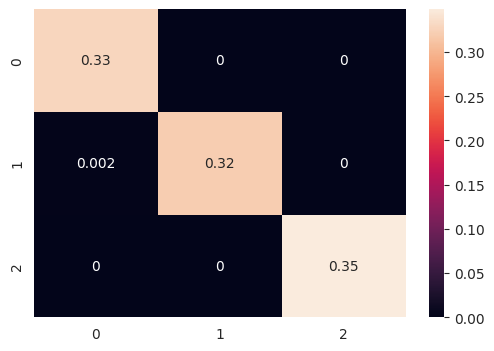

In [160]:
plt.subplots(figsize=(6,4))
cf_matrix = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':10})

#2. K-Nearest Neighbor model:

In [161]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3,5,7,9],
              'leaf_size': [10,20,30,40],
              'p': [1,2],
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree']}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose = 3, cv=5)
knn_model.fit(X_train, y_train)
knn_y_pred =  knn_model.predict(X_test)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.953 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.960 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.953 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.972 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.960 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.969 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.970 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.967 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_siz

In [162]:
#tham số tốt nhất
knn_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [163]:
accuracy = accuracy_score(y_test, knn_y_pred)
print(classification_report(y_test, knn_y_pred))
print("Accuracy of KNN with k = {}: {}".format(knn_model.best_params_['n_neighbors'], accuracy))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       327
           1       0.94      1.00      0.97       320
           2       1.00      1.00      1.00       346

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993

Accuracy of KNN with k = 3: 0.9778449144008057


<Axes: >

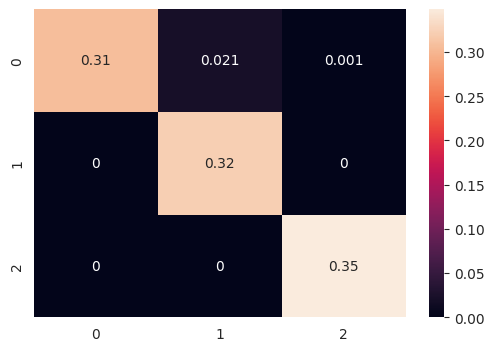

In [164]:
plt.subplots(figsize=(6,4))
cf_matrix = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':10})

#3. RandomForest model:

In [165]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto'],
    'criterion' :['gini', 'entropy']}

rf_model = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose = 3)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.955 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.951 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.970 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.967 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.941 total time=   0.6s
[CV 2/5] END criterion=g

In [166]:
#tham số tốt nhất
rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [167]:
accuracy = accuracy_score(y_test, rf_y_pred)
print(classification_report(y_test, rf_y_pred))
print("Accuracy of RandomForest:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       327
           1       0.97      1.00      0.99       320
           2       0.99      1.00      1.00       346

    accuracy                           0.99       993
   macro avg       0.99      0.99      0.99       993
weighted avg       0.99      0.99      0.99       993

Accuracy of RandomForest: 0.9889224572004028


<Axes: >

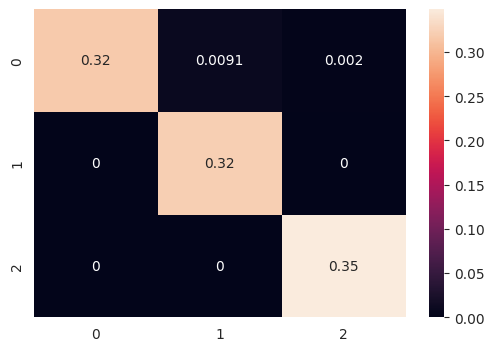

In [168]:
plt.subplots(figsize=(6,4))
cf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':10})